In [34]:
from collections import defaultdict
import itertools
import string
import re

import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')
from text_recognizer.models.line_cnn import LineCnn
from text_recognizer.datasets.emnist_lines import EmnistLinesDataset

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
model = LineCnn()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 896)           0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 32, 28, 1)     0         
_________________________________________________________________
permute_2 (Permute)          (None, 32, 28, 28, 1)     0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 32, 65)            1206977   
Total params: 1,206,977
Trainable params: 1,206,977
Non-trainable params: 0
_________________________________________________________________


In [37]:
dataset = EmnistLinesDataset()

In [38]:
from text_recognizer.train.util import train_model

history = train_model(
    model=model.model,
    x_train=dataset.x_train[:100],
    y_train=dataset.y_train[:100],
    epochs=10,
    batch_size=32,
    loss='categorical_crossentropy'
)

Train on 75 samples, validate on 25 samples
Epoch 1/10
75/75 [==============================] - 3s 35ms/step - loss: 3.9973 - acc: 0.0317 - val_loss: 3.5221 - val_acc: 0.1088
Epoch 2/10
75/75 [==============================] - 2s 30ms/step - loss: 3.5800 - acc: 0.4350 - val_loss: 3.0358 - val_acc: 0.6488
Epoch 3/10
75/75 [==============================] - 2s 32ms/step - loss: 2.9048 - acc: 0.7021 - val_loss: 2.0172 - val_acc: 0.6187
Epoch 4/10
75/75 [==============================] - 2s 32ms/step - loss: 1.5483 - acc: 0.7142 - val_loss: 1.3298 - val_acc: 0.6800
Epoch 5/10
75/75 [==============================] - 2s 30ms/step - loss: 1.1681 - acc: 0.7262 - val_loss: 1.2088 - val_acc: 0.6900
Epoch 6/10
75/75 [==============================] - 2s 31ms/step - loss: 1.0300 - acc: 0.7467 - val_loss: 1.0298 - val_acc: 0.7375
Epoch 7/10
75/75 [==============================] - 2s 32ms/step - loss: 0.8212 - acc: 0.7954 - val_loss: 0.9361 - val_acc: 0.7138
Epoch 8/10
75/75 [=====================

In [40]:
model.predict_on_image(dataset.x_test[0])

[autoreload of numpy.lib failed: Traceback (most recent call last):
  File "/Users/sergeyk/.local/share/virtualenvs/fsdl-text-recognizer-2EnXq1R6/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/sergeyk/.local/share/virtualenvs/fsdl-text-recognizer-2EnXq1R6/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/Users/sergeyk/.local/share/virtualenvs/fsdl-text-recognizer-2EnXq1R6/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/sergeyk/.local/share/virtualenvs/fsdl-text-recognizer-2EnXq1R6/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_r

('h_chccht________________________', 0.37649465)

AttributeError: 'EmnistLinesDataset' object has no attribute 'emnist'

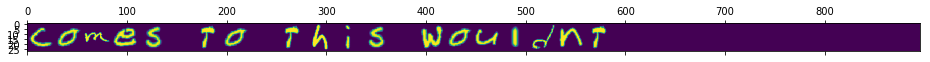

In [14]:
def convert_preds_to_string(preds, mapping):
    return ''.join(mapping[label] for label in np.argmax(preds, axis=-1).flatten()).strip()

plt.matshow(dataset.x_test[0])
convert_preds_to_string(model.model.predict(np.expand_dims(dataset.x_test[0], 0), dataset.mapping))